# Jason Hortsch 6006 Churn Model

In [339]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

## Exploratory Data Analysis
-------

>Load the data set into a pandas dataframe:

In [340]:
df = pd.read_csv("churn.csv")

> Take a look at the data:

In [341]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


> We can see that the area code 415 is listed for many states. We can also see that the churn column looks to be a string, or at the very least it is not a boolean or 0/1 representation. We can also look at all of the columns' data types just to get a better idea of what is going on:

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 572.9+ KB


> All of the 'object' type columns will have to be dealt with.

>Investigate the number of customers in each state visually:

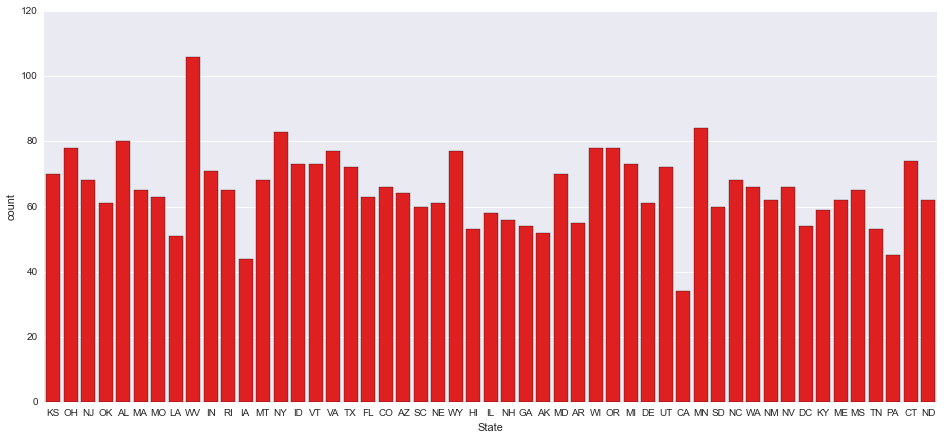

In [135]:
sns.plt.figure(figsize=(16,7))
sns.countplot('State', data=df, color='red');

>Investigate the different numbers of customers in each class. We can see that there are more customers who did not churn than those that did:

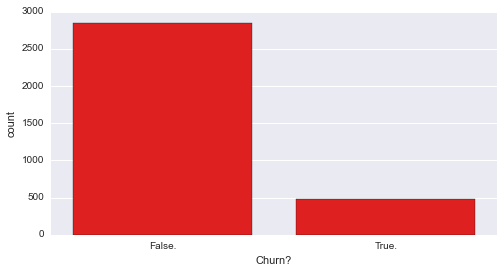

In [176]:
sns.plt.figure(figsize=(8,4))
sns.countplot('Churn?', data=df, color='red');

## Cleaning up the Data Frame
-------

> Now we will deal with creating labels that can be worked with - 0s for customers that did not churn, and 1s for customers that did in fact churn.

In [343]:
labels = []

In [344]:
for value in df["Churn?"]:
    if value == "True.":
        labels.append(1)
    else: 
        labels.append(0)

In [345]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [346]:
print labels.count(1)
print labels.count(0)
print (labels.count(0)*1.0)/labels.count(1)

483
2850
5.90062111801


>The above counts show us the exact ratio at which our classes are imbalanced - in this data set there are approximately six times as many customers that did not churn as those that did churn.

In [347]:
df["labels"] = labels

>We can take a look at the newly modified dataframe to ensure that the 1s and 0s were added correctly.

In [348]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,labels
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0


>As per good habits, here a copy of the data frame is created to work with going forward.

In [349]:
df2 = df.copy()

In [350]:
df2.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,labels
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0


Now we start to clean up the data frame. The churn column is dropped because we replaced it with 0s and 1s, which we can use when developing a model. Area code is dropped because we can easily see that most of the entries are 415, rendering it largely ineffective. The phone number is dropped, because there will be no connection with a phone number's actual digits and whether there was a customer churn or not. Some may say that the customer's state does not matter. I can see both sides to this argument, but I prefer to err on the side of leaving it in as a feature for now. It seems like there is the potential for that information to be valuable.

In [351]:
df2 = df2.drop("Churn?", axis = 1)

In [352]:
df2 = df2.drop("Area Code", axis = 1)

In [353]:
df2 = df2.drop("Phone", axis = 1)

>Inspecting our newly cleaned up data frame:

In [354]:
df2.head()

,State,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,labels
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


>The remaining columns that are not numbers (so state, international plan or not, and voicemail plan or not) now have to be converted to numbers so that they can properly be incorporated. Luckily, pandas includes a "get dummies" command to help us with that.

In [355]:
dummy_cols = ["State", "Int'l Plan", "VMail Plan"]

In [356]:
df3 = pd.get_dummies(df2, columns=dummy_cols)

>Inspecting our newly modified data frame, that now has categorical features replaced with numbers:

In [357]:
df3.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,1,1,0


## Creating X and y to Us When Modeling:
------

>Now we need to actually create our X and y to start testing models out with. The below link was used for help with doing this while using a dataframe:

In [358]:
#http://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

In [359]:
y = df3.pop('labels')

In [360]:
X = df3

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

>Looking at our X and y:

In [362]:
X.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,1,1,0


In [363]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

## Fitting and Testing Models
-------

### Random Forest

>A random forest is often considered one of the best ways to create a churn model:

In [364]:
from sklearn.ensemble import RandomForestClassifier

In [365]:
rfc = RandomForestClassifier()

In [366]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The score metric is one way of evaluating how a model performs. We can see that the random forest performs quite well:

In [29]:
rfc.score(X_test, y_test)

0.9388489208633094

However, I am partial to sk-learn's built in classification report, which provides us with a far more granular look at a model's metrics. Accuracy does not actually give us that much information. The recall score on the '1' class is what I am most interested in. This tells us the percent of customers that were going to churn that our model actually caught. For a cell phone company, I believe this to be the most important thing that the model does, so this will be the metric of focus for me. Another metric the classification report gives us access to is a class' f1 score. This score is the harmonic mean of the class' precision and recall, and is often the preferred metric to use, since is based on two different sources of information. 

In [178]:
print classification_report(y_test,rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       707
          1       0.94      0.57      0.71       127

avg / total       0.93      0.93      0.92       834



### Gradient Boosting Classifier
---

>The gradient boosting classifier is a very strong classifier overall, so it is worth looking at.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gbc = GradientBoostingClassifier()

In [32]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

>The model's accuracy is very impressive:

In [33]:
gbc.score(X_test, y_test)

0.94964028776978415

>Perhaps even more impressively, the model's recall and f1 score are both an improvement on the random forest classifier.

In [176]:
print classification_report(y_test,gbc.predict(X_test))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       707
          1       0.89      0.70      0.78       127

avg / total       0.94      0.94      0.94       834



### Logistic Regression

>While random forest and gradient boosted classifiers may prove to be the best options, it would be remiss not to investigate other classifiers. Next up is logistic regression:

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lgr = LogisticRegression()

In [73]:
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

>The score is not as good as the first two models:

In [74]:
lgr.score(X_test, y_test)

0.86091127098321341

>Even worse, the model's performance on customers who actually churned (the '1s') is very poor, amont all three metrics - precision, recall, and f1-score.

In [75]:
print classification_report(y_test,lgr.predict(X_test))

             precision    recall  f1-score   support

          0       0.88      0.97      0.92       718
          1       0.50      0.19      0.27       116

avg / total       0.83      0.86      0.83       834



### AdaBoost Classifier

>Another model that could be used is the AdaBoost classifier:

In [77]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
abc = AdaBoostClassifier()

In [79]:
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

>The accuracy seems decent, but as we saw with the logistic regression model, accuracy can hide problems with the smaller class.

In [80]:
abc.score(X_test, y_test)

0.88369304556354911

>In a pleasant surprise, the AdaBoost classifier performs better than the logistic regression classifier for the class of customers that churned, but it was still not as good as the gradient boosted classifier or the random forest classifier.

In [81]:
print classification_report(y_test,abc.predict(X_test))

             precision    recall  f1-score   support

          0       0.91      0.96      0.93       718
          1       0.62      0.41      0.50       116

avg / total       0.87      0.88      0.87       834



### SVM

>Lastly is the SVM model. SVM models are well-known, are conceptually on the simpler side, and can be good if your data has imbalanced classes.

In [83]:
from sklearn.svm import SVC

In [84]:
svc = SVC()

In [85]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

>The model seems ok according to accuracy, but remember, this can be very misleading.

In [86]:
svc.score(X_test, y_test)

0.86091127098321341

>In fact, we can see that the model does terribly with customers that were classified as a 1! The error below occurs because the classification report was trying to divide by zero (that tells you how poorly the model was doing with the 1s class).

In [87]:
print classification_report(y_test,svc.predict(X_test))

             precision    recall  f1-score   support

          0       0.86      1.00      0.93       718
          1       0.00      0.00      0.00       116

avg / total       0.74      0.86      0.80       834



//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


>Based on the above metrics and the error, a reasonable hunch seems to be that the model simply predicted every single customer to NOT churn. This is easy to investigate, and as can be seen below, this is exactly what happened. The model predicted everyone to not churn, and since the not churn model was bigger, the accuracy did not seem terrible. Luckily, we were able to see through this via the classification report.

In [92]:
svc.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

>After this whirlwind tour through various classifiers, it appears as if the first two we looked at, random forest and gradient boosted classifiers, performed the best. To see how much better they can become, we can now turn towards grid searching:

## Grid Searching

>Models have parameters that can be tuned. A grid search can help us to find the ideal values to feed a model.

In [2]:
from sklearn.grid_search import GridSearchCV

### Random Forest Grid Search

In [192]:
rfc_grid = {'n_estimators': [5,10,20,100],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 100, None],
                          'max_leaf_nodes': [10, 100, None],
                          'min_samples_split': [2,3,4]}

rfc_gridsearch = GridSearchCV(RandomForestClassifier(),
                             rfc_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='mean_squared_error')

rfc_gridsearch.fit(X_train, y_train)

print "best parameters:", rfc_gridsearch.best_params_

best_model = rfc_gridsearch.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 200 jobs       | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 450 jobs       | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   48.4s finished


best parameters: {'min_samples_split': 3, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}


>The above are the values that the grid search informs us will yield the best results. We then fit a new model that uses these parameters (max_depth and max_leaf_nodes merely stay at their defaults):

In [248]:
rfc2 = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=3)

In [249]:
rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [244]:
print classification_report(y_test,rfc2.predict(X_test))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       718
          1       0.93      0.70      0.80       116

avg / total       0.95      0.95      0.95       834



>We can see that this new random forest, with the new parameters, outperforms the original random forest model.

In [ ]:
rfc2_cross_val = cross_val_score(rfc2, X_train, y_train, cv=10)

In [253]:
print "Cross validation of the rfc2 model:"
print rfc2_cross_val
print "\n"
print "Mean of these scores:"
print rfc2_cross_val.mean()

Cross validation of the rfc2 model:
[ 0.93625498  0.94820717  0.936       0.944       0.916       0.956       0.94
  0.93574297  0.93574297  0.95983936]


Mean of these scores:
0.94077874526


>This is just an exampe of cross validation with 10 folds. Bear in mind, though, that I am most interested in the model's performance on the class of customers who actually churned, so I do not put too much weight on this particular score.

### Random Forest with Weights

>There may rightfully be some concern that the difference in sizes between the classes may cause some issues. Sci-Kit Learn includes a parameter that can automatically help with this. I thought it prudent to create a new model, using the same parameters as above, but with the 'class_weight' parameter set to automatically balance. Here is this model:

In [254]:
rfc3 = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=3, class_weight="auto")

In [259]:
rfc3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [260]:
print classification_report(y_test,rfc3.predict(X_test))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       718
          1       0.94      0.67      0.78       116

avg / total       0.95      0.95      0.94       834



>At best, this model with class weights balanced seems comparable to the previous model, while at worst it may even be a hair worse.

In [302]:
rfc3_cross_val = cross_val_score(rfc3, X_train, y_train, cv=10)

In [303]:
print "Cross validation of the rfc3 model:"
print rfc3_cross_val
print "\n"
print "Mean of these scores:"
print rfc3_cross_val.mean()

Cross validation of the rfc3 model:
[ 0.94023904  0.94023904  0.932       0.936       0.92        0.936       0.932
  0.93172691  0.91566265  0.92369478]


Mean of these scores:
0.9307562425


>In addition to what can be seen in the above metrics, the cross validation scores are also a little lower for the model that included the automatic weight balancing.

### Gradient Boosted Classifier Grid Search

In [59]:
gbc_grid = {'loss': ['deviance', 'exponential'],
                          'learning_rate': [.01, .1, .2],
                          'n_estimators': [50, 100, 250],
                          'max_depth': [2, 3, 4]}

gbc_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gbc_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='mean_squared_error')

gbc_gridsearch.fit(X_train, y_train)

print "best parameters:", gbc_gridsearch.best_params_

best_model = gbc_gridsearch.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  1.4min finished


best parameters: {'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.2, 'max_depth': 4}


>These are the parameters that the grid search says will make the gradient boosted classifier perform the best. We then use these parameters to fit a new gradient boosted model:

In [62]:
gbc2 = GradientBoostingClassifier(n_estimators=100, loss='exponential', learning_rate=.2, max_depth=4)

In [227]:
gbc2.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.2, loss='exponential',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [214]:
print classification_report(y_test,gbc2.predict(X_test))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       718
          1       0.92      0.78      0.85       116

avg / total       0.96      0.96      0.96       834



>We can see that this model outperforms the original gradient boosted model. It performs extremely well in fact.

In [307]:
gbc2_cross_val = cross_val_score(gbc2, X_train, y_train, cv=10)

In [308]:
print "Cross validation of the gbc2 model:"
print gbc2_cross_val
print "\n"
print "Mean of these scores:"
print gbc2_cross_val.mean()

Cross validation of the gbc2 model:
[ 0.93625498  0.9561753   0.952       0.968       0.928       0.972       0.96
  0.96787149  0.97188755  0.96787149]


Mean of these scores:
0.958006080097


## Conclusions

>Ultimately, both the tuned random forest and gradient boosted classifiers performed quite well. I think that for a business, correctly identifying potential customers that may soon churn is the most important thing the model can do. As such, that's why I made my focus the recall score on the customers who actually churned. The gradient boosted classifier correctly identified approximately 78% of the customers who churned in the test set. This was better than the random forest classifier. However, this came at the cost of the churn class' precision, which was only at 92%, as compared to 94% for the random forest model. This means that the gradient boosted model may be slightly more prone to classify customers as likely to churn when in fact they won't. However, these numbers are only for the model's performance on a test set, and in the real world, things may be different. The differences may actually prove negligible. 

>I don't consider small dip in churn class precision as overly harmful to the company - if they go out of their way to appease customers in order to get them stay, and are wrong on 8% of these customers, that shouldn't lead to much lasting harm. On the other hand, misidentifying customers who are going to churn as not likely to churn puts the company at risk of losing that customer. For this reason, the gradient boosted class' 78% success rate at identifying these customers is very attractive. 

>Between the final two models above, I'm not really sure if it could be said that one is 'better.' Obviously, the gradient boosted classifier has slightly better metrics (for example its churn class f1 score is noticeably higher), but it is also computationally more expensive (if time to run on my computer is any indication). It also would be harder to explain what gradient boosting is to an audience. That is not to say that a random forest would be easy to explain, but it would probably be easier.

>Overall, I think both of the final two models above performed quite well. If I absolutely had to pick one model, I would go with the gradient boosted classifier, just because it's churn customer recall was so impressive. I think this is the most important performance metric for a business, and it did well.

## Business Insights

>The goal of a model is always to provide business insights. This section briefly looks at other information the models can give to us that may be of use to the company. The models can tell us what features were the most important:

### Getting Feature Importances

In [311]:
rf_importances = rfc2.feature_importances_

In [312]:
rf_importances

array([ 0.03162274,  0.01542208,  0.14005463,  0.03377061,  0.12574378,
        0.05546933,  0.02738979,  0.0532123 ,  0.03469096,  0.02859275,
        0.03515965,  0.04250411,  0.0426047 ,  0.04309493,  0.10052261,
        0.00108321,  0.00076396,  0.00147525,  0.00118324,  0.00191014,
        0.00208436,  0.00333985,  0.00135229,  0.00158283,  0.0007644 ,
        0.0011197 ,  0.00047233,  0.00060153,  0.00175519,  0.00091735,
        0.00169755,  0.0017431 ,  0.00052889,  0.00201593,  0.00235326,
        0.00247075,  0.00341126,  0.00140007,  0.00235633,  0.00066788,
        0.00465273,  0.00235174,  0.00131376,  0.0012259 ,  0.00161093,
        0.00141816,  0.00335859,  0.00075357,  0.00164996,  0.00128916,
        0.00243981,  0.00096923,  0.00251832,  0.00138486,  0.00114718,
        0.0038736 ,  0.00066999,  0.00087789,  0.00314398,  0.00136038,
        0.00154102,  0.00159828,  0.00237751,  0.00118834,  0.00106365,
        0.0008122 ,  0.03802323,  0.04126389,  0.01267602,  0.01

In [313]:
gb_importances = gbc2.feature_importances_

In [314]:
gb_importances

array([ 0.07758173,  0.02570511,  0.07107894,  0.08721612,  0.07603046,
        0.05224682,  0.04347791,  0.05623337,  0.07108051,  0.06645883,
        0.03721205,  0.0405576 ,  0.04673469,  0.03802773,  0.04694827,
        0.        ,  0.00188919,  0.        ,  0.0007823 ,  0.00064006,
        0.00948357,  0.00636992,  0.01630551,  0.00015115,  0.        ,
        0.01046619,  0.00111777,  0.00050981,  0.0027025 ,  0.00148102,
        0.0013214 ,  0.00348073,  0.        ,  0.00328886,  0.00405178,
        0.00172099,  0.0081328 ,  0.00097859,  0.00036405,  0.00042437,
        0.00438255,  0.00423897,  0.00084865,  0.00133264,  0.00356641,
        0.00370893,  0.00252907,  0.        ,  0.0002845 ,  0.00028915,
        0.00244712,  0.        ,  0.00073757,  0.0039116 ,  0.00203557,
        0.00349453,  0.00128704,  0.        ,  0.00328671,  0.00353572,
        0.01514204,  0.        ,  0.00188924,  0.        ,  0.00029779,
        0.00134091,  0.00582297,  0.00758856,  0.00515639,  0.00

In [316]:
features = list(df3.columns.values)

### Top Features According to Each Model

In [317]:
rf_pairs = zip(features, rf_importances)

In [322]:
# http://stackoverflow.com/questions/10695139/sort-a-list-of-tuples-by-2nd-item-integer-value
print "The top ten features according to the random forest model:"
sorted(rf_pairs, key=lambda x: x[1], reverse=True)[:10]

The top ten features according to the random forest model:


[('Day Mins', 0.14005463460451739),
 ('Day Charge', 0.12574377595145381),
 ('CustServ Calls', 0.10052260582185404),
 ('Eve Mins', 0.055469328066938585),
 ('Eve Charge', 0.053212302125255795),
 ('Intl Charge', 0.043094933497838189),
 ('Intl Calls', 0.042604695334240231),
 ('Intl Mins', 0.042504107808711319),
 ("Int'l Plan_yes", 0.041263891178773111),
 ("Int'l Plan_no", 0.038023231980670445)]

In [319]:
gb_pairs = zip(features, gb_importances)

In [323]:
print "The top ten features according to the gradient boosted classifier model:"
sorted(gb_pairs, key=lambda x: x[1], reverse=True)[:10]

The top ten features according to the gradient boosted classifier model:


[('Day Calls', 0.08721611526076338),
 ('Account Length', 0.077581730155666523),
 ('Day Charge', 0.076030458759742695),
 ('Night Mins', 0.071080514260919381),
 ('Day Mins', 0.071078941345548957),
 ('Night Calls', 0.066458832252557137),
 ('Eve Charge', 0.056233370964154761),
 ('Eve Mins', 0.052246816895930255),
 ('CustServ Calls', 0.046948265316233556),
 ('Intl Calls', 0.046734687468998518)]

>Day Charge appears in the top three importances for both models. Let's investigate by looking at the average day charge for customers who churned, and for those who didn't churn.

In [335]:
day_charge = df3['Day Charge'].tolist()

In [330]:
dc = zip(day_charge, labels)
dc[:5]

[(45.07, 0),
 (27.469999999999999, 0),
 (41.380000000000003, 0),
 (50.899999999999999, 0),
 (28.34, 0)]

In [331]:
print labels.count(1)
print labels.count(0)

483
2850


In [334]:
sum = 0
for pair in dc:
    if pair[1]==1:
        sum += pair[0]
print "Average day charge for a customer who churned: ", sum/483.

sum = 0
for pair in dc:
    if pair[1]==0:
        sum += pair[0]
print "Average day charge fo ra customer who did not churn: ", sum/2850.

Average day charge for a customer who churned:  35.1759213251
Average day charge fo ra customer who did not churn:  29.7804210526


>Interesting. The average day charge for customers who churned is noticeably higher than the average day charge for customers who did not churn. Let's continue the analysis. The day minutes feature was in the top five for importance among both models as well. Let's look at the difference between the two classes' day minutes.

In [336]:
day_mins = df3['Day Mins'].tolist()

In [337]:
dm = zip(day_mins, labels)
dm[:5]

[(265.10000000000002, 0),
 (161.59999999999999, 0),
 (243.40000000000001, 0),
 (299.39999999999998, 0),
 (166.69999999999999, 0)]

In [338]:
sum = 0
for pair in dm:
    if pair[1]==1:
        sum += pair[0]
print "The average day minutes for customers who churned: ", sum/483.

sum = 0
for pair in dm:
    if pair[1]==0:
        sum += pair[0]
print "The average day minutes for customers who did not churn: ", sum/2850.

The average day minutes for customers who churned:  206.914078675
The average day minutes for customers who did not churn:  175.175754386


>Also very interesting. The day minutes usage was also noticeably higher for customers who churned than those who did not churn.

### Where to Take This

>Judging by these two features, it appears that customers who simply use the service more (having higher day charges or higher day minutes, for example) are more likely to churn. Now, this is in no way definitive - it is just one avenue that could be explored. This was a very basic, surface-level look at the issue, and it is likely more complicated than that. However, it could be a place to start. Perhaps the people who use the service more are business users, who will switch companies at the slightest bit of downtime in their service. Perhaps these users who use the service the most and pay a lot of money to do so simply get frustrated when they have issues, and think they should be treated better, so they leave their current cell service provider. To counteract this, maybe the company could start offering 'thank yous' or rewards to customers who spend the most or use the most minutes. This could potentially appease that group of customers, who look like they may be prone to churn. If they can make those customers happy, maybe they will not churn as much. Again, it must be cautioned that this is not definitive, but it could be something that is worth looking further into.